In [2]:
# %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

In [7]:
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base

from sqlalchemy import Column, Integer, String, Float

# Reflect Tables into SQLAlchemy ORM

In [22]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import desc
from sqlalchemy import create_engine, func, inspect

Base = automap_base()

In [9]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [11]:
# View all of the classes that automap found

Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [19]:
session.query(Measurement).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1ad8d2e2220>,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'prcp': 0.08,
 'tobs': 65.0,
 'id': 1}

In [21]:
for row in session.query(Measurement.station, Measurement.date).limit(15).all():
    print(row)

('USC00519397', '2010-01-01')
('USC00519397', '2010-01-02')
('USC00519397', '2010-01-03')
('USC00519397', '2010-01-04')
('USC00519397', '2010-01-06')
('USC00519397', '2010-01-07')
('USC00519397', '2010-01-08')
('USC00519397', '2010-01-09')
('USC00519397', '2010-01-10')
('USC00519397', '2010-01-11')
('USC00519397', '2010-01-12')
('USC00519397', '2010-01-14')
('USC00519397', '2010-01-15')
('USC00519397', '2010-01-16')
('USC00519397', '2010-01-17')


# Exploratory Precipitation Analysis

In [30]:
# Find the most recent date in the data set.

session.query(Measurement.station, func.max(Measurement.date)).all()

[('USC00519397', '2017-08-23')]

In [48]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


prcp_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-23').all()
df_prcp = pd.DataFrame(prcp_query, columns =['date', 'prcp'])
df_prcp.head()


,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


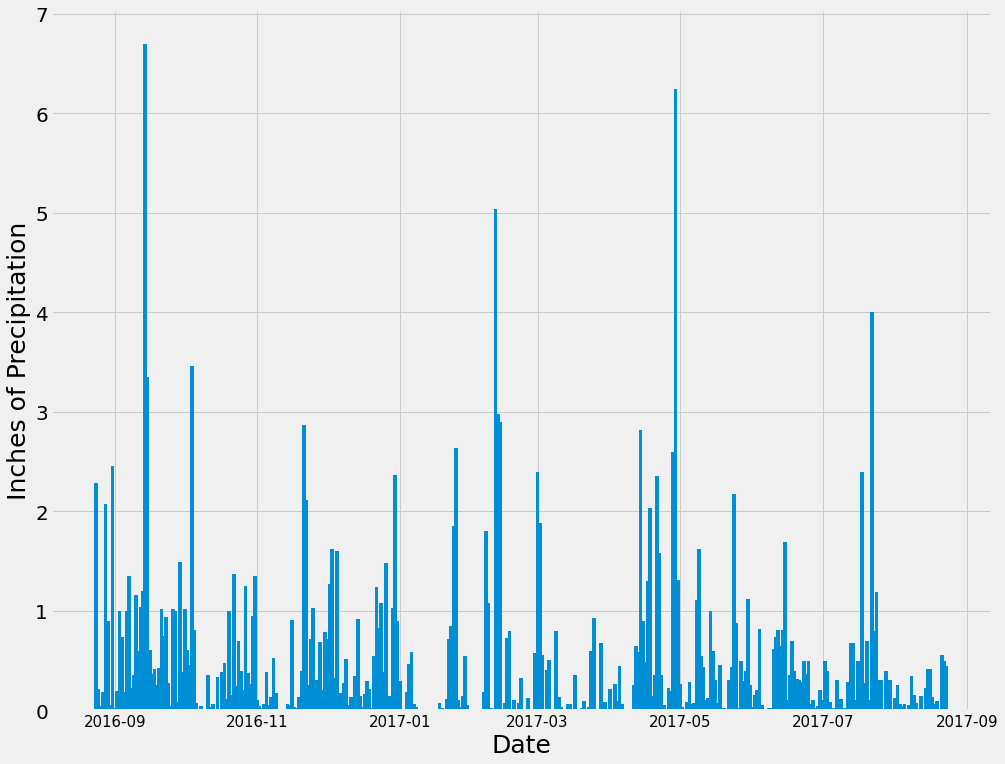

In [51]:
# Use Pandas Plotting with Matplotlib to plot the data

df_prcp["date_formatted"] = pd.to_datetime(df_prcp.date)
x_values = df_prcp.date_formatted.values
y_values = df_prcp.prcp.values

plt.figure(figsize = (15,12))

plt.bar(x_values, y_values, width = 1.6)
plt.xlabel("Date", fontsize = 25)
plt.ylabel("Inches of Precipitation", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 20)

plt.show()

In [49]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df_prcp.describe()


,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset



In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()